# Intro to classification starter code

#### Below is a simple implementation of KNN with K=5

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import numpy as np
np.set_printoptions(suppress=True) # This gets rid of the scientific notation.
%matplotlib inline

# Get the data and separate between target and features.
iris = datasets.load_iris()

iris_df = pd.DataFrame(data= np.c_[iris.data[:, 2:], iris['target']], # We will only use two features.
                     columns= iris['feature_names'][2:] + ['target'])
iris_df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0


In [2]:
X = iris_df[['petal length (cm)', 'petal width (cm)']]
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Instantiate the model
# n_neighbors is our option in KNN. We'll later tune this value to attempt to improve our prediction.
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fit the model - just preserving the data set no calculations
knn.fit(X_train, y_train)

# Predict
print( knn.predict(X_test))

# Assess
print( knn.score(X_test, y_test))

[ 1.  0.  2.  1.  1.  0.  1.  2.  1.  1.  2.  0.  0.  0.  0.  1.  2.  1.
  1.  2.  0.  2.  0.  2.  2.  2.  2.  2.  0.  0.  0.  0.  1.  0.  0.  2.
  1.  0.  0.  0.  2.  1.  1.  0.  0.  1.  1.  2.  1.  2.  1.  2.  1.  0.
  2.  1.  0.  0.  0.  1.  2.  0.  0.  0.  1.  0.  1.  2.  0.  1.  2.  0.
  2.  2.  1.]
0.986666666667


**Run the model with standarised features**

In [3]:
# We can also scale our data to create an standarised dataset
scaler = StandardScaler() # Mean of zero, standard deviation of 1
Xss = scaler.fit_transform(X) # Applies transformation and stores for use with future data points
Xss = pd.DataFrame(data=Xss, # We will only use two features.
                   columns= iris['feature_names'][2:])
Xss.describe()

,petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02
mean,-1.482518e-15,-1.623146e-15
std,1.003350e+00,1.003350e+00
min,-1.568735e+00,-1.444450e+00
25%,-1.227541e+00,-1.181504e+00
50%,3.362659e-01,1.332259e-01
75%,7.627586e-01,7.905908e-01
max,1.786341e+00,1.710902e+00


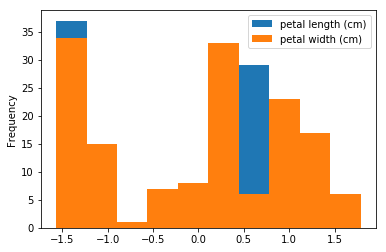

In [4]:
Xss.plot(kind='hist')

In [6]:
# RE IMPLEMENT KNN WITH THE STANDARISED SET

X_train, X_test, y_train, y_test = train_test_split(Xss, y, test_size=0.5, random_state=42)

# Instantiate the model
# n_neighbors is our option in KNN. We'll later tune this value to attempt to improve our prediction.
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fit the model - just preserving the data set no calculations
knn.fit(X_train, y_train)

# Predict
print( knn.predict(X_test))

# Assess
print( knn.score(X_test, y_test))

[ 1.  0.  2.  1.  1.  0.  1.  2.  1.  1.  2.  0.  0.  0.  0.  1.  2.  1.
  1.  2.  0.  2.  0.  2.  2.  2.  2.  2.  0.  0.  0.  0.  1.  0.  0.  2.
  1.  0.  0.  0.  2.  1.  1.  0.  0.  1.  1.  2.  1.  2.  1.  2.  1.  0.
  2.  1.  0.  0.  0.  1.  2.  0.  0.  0.  1.  0.  1.  2.  0.  1.  2.  0.
  2.  2.  1.]
0.986666666667


#### Solving for K

** Implement a function that will try different values for K and store their scores. **

Figure out what the best value for K is and plot accuracy for all the different values of K.

Compare against the baseline, Does it approximate it?

In [39]:
def k_nn (X_train, y_train, X_test, y_test):
    results = {}
    for k in range(len(X_train)):
        if k > 1:
            knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
            knn.fit(X_train, y_train)
            results[k] = knn.score(X_test, y_test)
    df = pd.DataFrame.from_dict(results, orient='index')
    return df

In [40]:
results = k_nn(X_train, y_train, X_test, y_test)

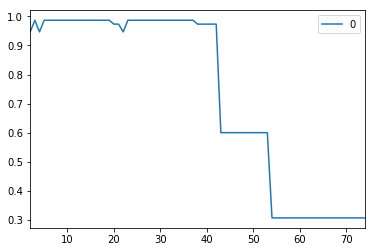

In [41]:
results.plot()

In [43]:
results.max()

0    0.986667
dtype: float64

In [46]:
results.head()

,0
2,0.946667
3,0.986667
4,0.946667
5,0.986667
6,0.986667


In [45]:
import matplotlib.pyplot as plt

In [44]:
iris_df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64